<a href="https://colab.research.google.com/github/Valtern/machinelearningsmt5/blob/main/TG13_2341720067_ANTONIUS_KAHARAP_KAUTSAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import google.colab
google.colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lab 1

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

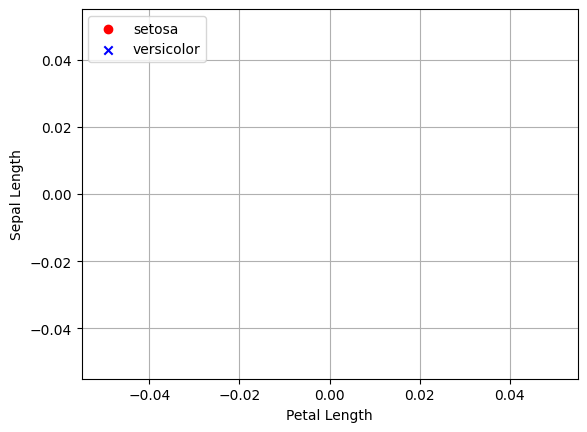

In [11]:
df = pd.read_csv('/content/drive/MyDrive/MLearning/iris (2).csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [12]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [13]:
y = df.iloc[1:101, 4].values # Select the first 100 data points, skipping the header (row 0)
y = np.where(y == 'Iris-setosa', -1, 1) # Change label encoding to -1 and 1
X = df.iloc[1:101, [0, 3]].values # Slice training data, skipping the header (row 0)
X = X.astype(float) # Convert the data in X to float type

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

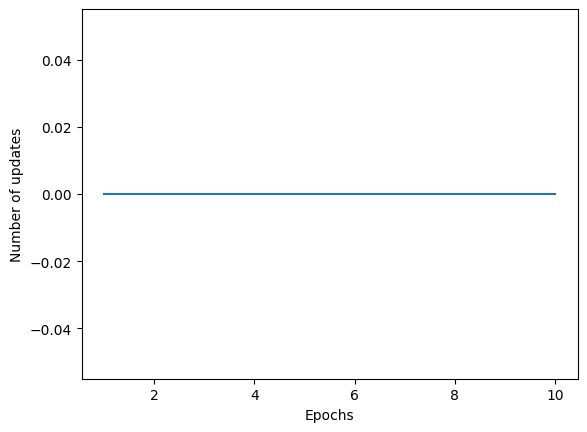

In [14]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [15]:
# create a function to plot the decision regions

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

Yes, I am well aware that my output in lab 1 is not exactly like it's on Lab 1 in the material. No clue what's causing it.

At first, an error showed up when attempting to run the code in the material saying that it cannot read at float... thus i converted the data to float... and then still nothing showed up... and thus I decided to use ai to ask whats happening... so the AI decided to drop the 1st row which it assumes was the header... but still nothing, yeah no clue but at least I do understand the material though... so I guess its no worries ? Not sure if you're actually reading this though, if you do probably let me know in the class next week if you do.

# Lab 2

In [16]:
from sklearn.neural_network import MLPClassifier

In [17]:
y = [0, 1, 1, 0] # labels
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

In [18]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

In [19]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# Lab 3

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [21]:
dataset = pd.read_csv('/content/drive/MyDrive/MLearning/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [22]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
ann = tf.keras.models.Sequential()

In [28]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [29]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [30]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [31]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6726 - loss: 0.6654
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8150 - loss: 0.4729
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8109 - loss: 0.4439
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8133 - loss: 0.4276
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8190 - loss: 0.4223
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8186 - loss: 0.4289
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8200 - loss: 0.4199
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8244 - loss: 0.4134
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8287 - loss: 0.4071
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8283 - loss: 0.4075
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8282 - loss: 0.4057
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [33]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
[[False]]


In [34]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1517   78]
 [ 198  207]]


0.862

# Lab 4

In [36]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

In [37]:
# Load images and labels from a directory structure
img_dir = '/content/drive/MyDrive/MLearning/images'

def load_dataset(img_path):
    p = Path(img_path)
    img_list = []
    for folder in p.glob('*'):
        label = folder.name
        for file in folder.glob('*.jpg'):
            img = cv2.imread(str(file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_list.append((img, label))
    return img_list

# Correctly construct the absolute paths for training and testing directories
train_dir_full = f"{img_dir}/training/"
test_dir_full  = f"{img_dir}/test/"

train_img = load_dataset(train_dir_full)
test_img  = load_dataset(test_dir_full)

In [38]:
# Preprocess images: resize and encode labels
def resize_image(img, size=(256,256)):
    return cv2.resize(img, size)

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    X = []
    y = []
    for img, label in img_list:
        img_std = resize_image(img)
        X.append(img_std)
        y.append(label_encoder(label))
    return X, y

X_train_img, y_train = preprocess(train_img)
X_test_img,  y_test  = preprocess(test_img)

In [39]:
# Extract HOG features
def extract_hog(X_imgs):
    feats = []
    for img in X_imgs:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        hog_feat = hog(gray,
                       orientations=9,
                       pixels_per_cell=(8,8),
                       cells_per_block=(2,2),
                       block_norm='L2-Hys',
                       visualize=False,
                       feature_vector=True)
        feats.append(hog_feat)
    return np.array(feats)

X_train_feat = extract_hog(X_train_img)
X_test_feat  = extract_hog(X_test_img)

In [40]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled  = scaler.transform(X_test_feat)

In [41]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42
)

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)

In [42]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │     4,428,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,436,737 (16.92 MB)

 Trainable params: 4,436,737 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.6823 - loss: 0.6838 - val_accuracy: 0.9792 - val_loss: 0.2632
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9891 - loss: 0.0760 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9950 - loss: 0.0059 - val_accuracy: 1.0000 - val_loss: 5.6814e-04
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 3.1960e-06 - val_accuracy: 1.0000 - val_loss: 1.4247e-04
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 7.6021e-04 - val_accuracy: 1.0000 - val_loss: 7.6243e-05
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 2.7820e-05 - val_accuracy: 1.0000 - val_loss: 5.4144e-05
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 1.3792e-04 - val_accuracy: 1.0000 - val_loss: 4.1946e-05
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 3.8664e-05 -

In [44]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8522 - loss: 2.1473 
Test Accuracy: 0.893750011920929


In [45]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        80
           1       0.93      0.85      0.89        80

    accuracy                           0.89       160
   macro avg       0.90      0.89      0.89       160
weighted avg       0.90      0.89      0.89       160

[[75  5]
 [12 68]]


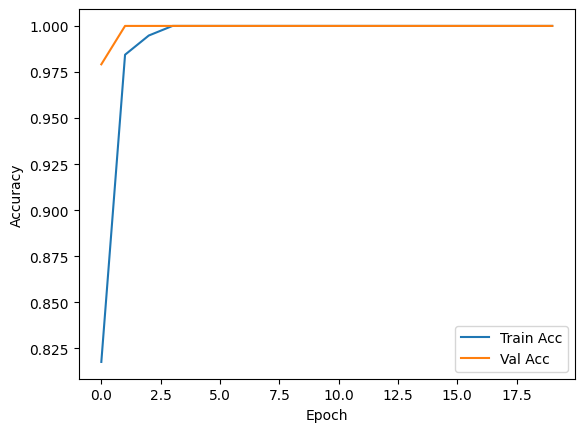

In [46]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
model.save('day_night_classifier_model.h5')

# Lab Assignment

* **Perform classification on the MNIST dataset using an ANN model**

* **You are permitted to conduct exploration of**,

* Preprocessing methods
* Feature selection
* ANN architecture
* Activation functions

* **The ANN is implemented using TensorFlow.**

In [48]:
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


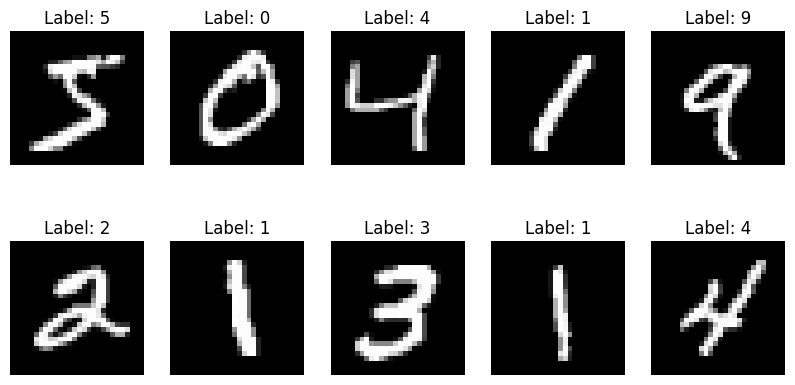

In [49]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [50]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Min value:", X_train.min())
print("Max value:", X_train.max())

Min value: 0.0
Max value: 1.0


In [51]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2), # Regularization

    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8384 - loss: 0.5393 - val_accuracy: 0.9593 - val_loss: 0.1393
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9539 - loss: 0.1506 - val_accuracy: 0.9653 - val_loss: 0.1170
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9665 - loss: 0.1092 - val_accuracy: 0.9728 - val_loss: 0.0966
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9731 - loss: 0.0847 - val_accuracy: 0.9711 - val_loss: 0.0938
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9771 - loss: 0.0736 - val_accuracy: 0.9739 - val_loss: 0.0918
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9770 - loss: 0.0730 - val_accuracy: 0.9737 - val_loss: 0.0954
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9800 - loss: 0.0620 - val_accuracy: 0.9756 - val_loss: 0.0893
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9820 - loss: 0.0540 - 

313/313 - 2s - 5ms/step - accuracy: 0.9783 - loss: 0.0855

Test accuracy: 0.9783


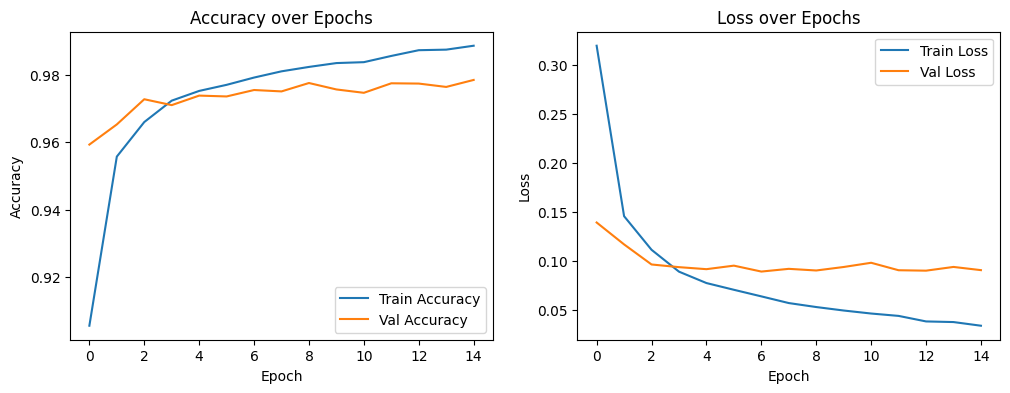

In [53]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



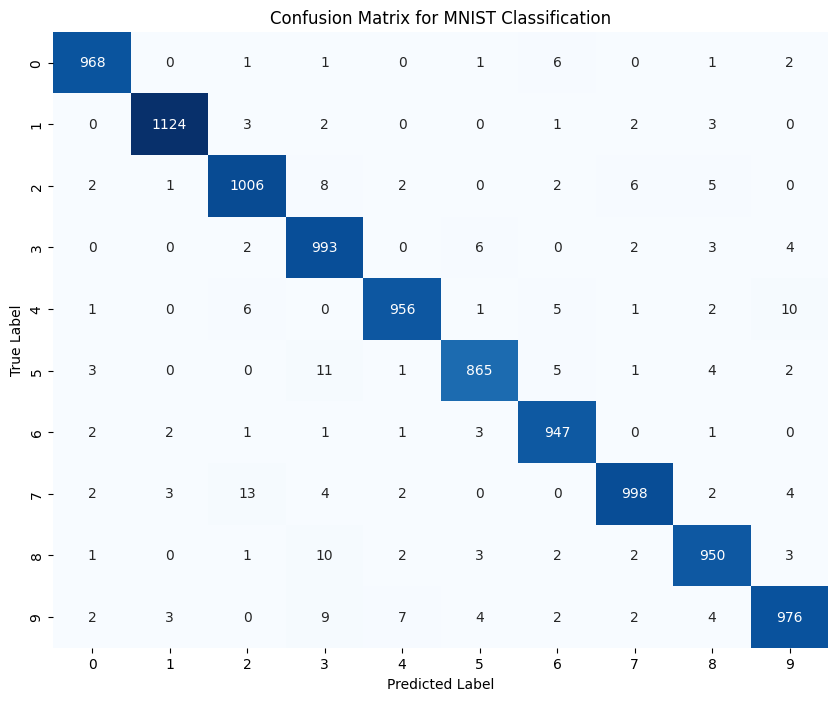

In [54]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

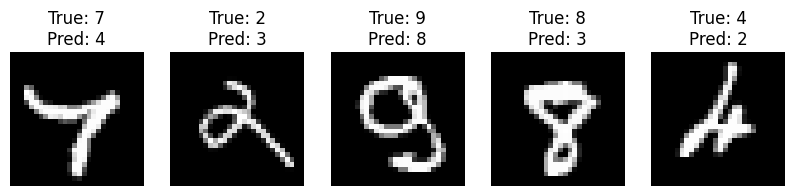

In [55]:
errors = (y_pred != y_test)
y_pred_errors = y_pred[errors]
y_test_errors = y_test[errors]
X_test_errors = X_test[errors]

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_errors[i], cmap='gray')
    plt.title(f"True: {y_test_errors[i]}\nPred: {y_pred_errors[i]}")
    plt.axis('off')
plt.show()